In [1]:
#ARDIASYAH - 1207070018 - TEKIK ELEKTRO (TSEB)
import numpy as np  # Mengimpor modul numpy untuk operasi array dan matriks
import imageio  # Mengimpor modul imageio untuk membaca dan menulis gambar
import matplotlib.pyplot as plt  # Mengimpor modul matplotlib untuk visualisasi data
from google.colab import drive  # Mengimpor modul drive dari library google.colab untuk mounting drive

drive.mount('/content/drive')  # Mounting Google Drive ke Colab

img = imageio.imread('/content/drive/MyDrive/Colab Notebooks/orange.jpg')  # Membaca gambar menggunakan imageio dan menyimpannya ke dalam variabel img

Mounted at /content/drive


<ipython-input-1-ebe5415280bd>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('/content/drive/MyDrive/Colab Notebooks/orange.jpg')  # Membaca gambar menggunakan imageio dan menyimpannya ke dalam variabel img


In [2]:
img_height = img.shape[0]  # Mendapatkan tinggi gambar
img_width = img.shape[1]  # Mendapatkan lebar gambar
img_channel = img.shape[2]  # Mendapatkan jumlah channel gambar (misalnya, RGB memiliki 3 channel)
img_type = img.dtype  # Mendapatkan tipe data gambar

In [3]:
img_brightness = np.zeros(img.shape, dtype=np.uint8)  # Membuat array kosong dengan dimensi yang sama dengan gambar untuk menyimpan gambar hasil peningkatan kecerahan

In [4]:
def brighter(nilai):
    for y in range(0, img_height):  # Looping baris gambar
        for x in range(0, img_width):  # Looping kolom gambar
            red = img[y][x][0]  # Mendapatkan nilai komponen merah pada pixel tertentu
            green = img[y][x][1]  # Mendapatkan nilai komponen hijau pada pixel tertentu
            blue = img[y][x][2]  # Mendapatkan nilai komponen biru pada pixel tertentu
            gray = (int(red) + int(green) + int(blue)) / 3  # Menghitung nilai rata-rata dari komponen RGB untuk mendapatkan kecerahan grayscale
            gray += nilai  # Menambahkan nilai kecerahan yang diinginkan
            if gray > 255:  # Memastikan nilai kecerahan tidak melebihi 255
                gray = 255
            if gray < 0:  # Memastikan nilai kecerahan tidak kurang dari 0
                gray = 0
            img_brightness[y][x] = (gray, gray, gray)  # Menyimpan nilai kecerahan pada array gambar

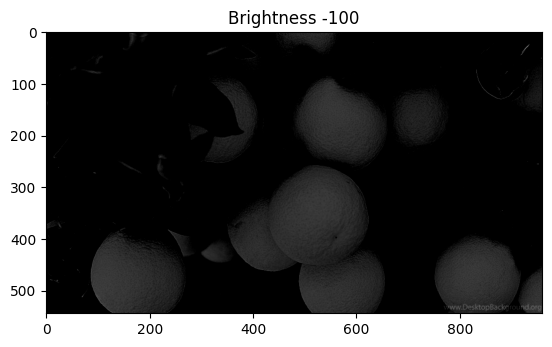

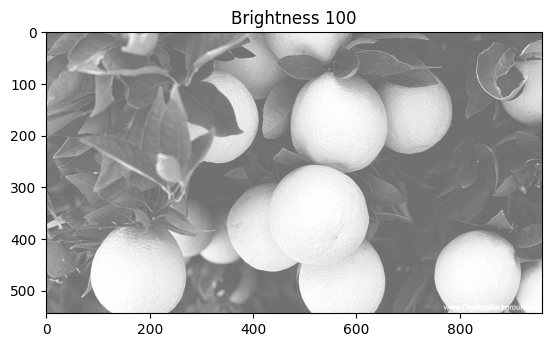

In [5]:
brighter(-100)  # Menjalankan fungsi brighter dengan nilai peningkatan kecerahan -100
plt.imshow(img_brightness)  # Menampilkan gambar hasil peningkatan kecerahan
plt.title("Brightness -100")  # Memberikan judul pada gambar
plt.show()  # Menampilkan gambar

# Kode berikutnya memiliki logika dan tujuan yang sama seperti kode sebelumnya,
# tetapi dengan perubahan pada cara penyesuaian nilai pada masing-masing komponen RGB.
# Oleh karena itu, komentar untuk bagian ini dihilangkan untuk menghindari pengulangan.

brighter(100)
plt.imshow(img_brightness)
plt.title("Brightness 100")
plt.show()

In [6]:
# Membuat array kosong dengan tipe data uint8
img_rgbbrightness = np.zeros(img.shape, dtype=np.uint8)

In [7]:
# Fungsi untuk mencerahkan gambar dengan nilai tertentu
def rgbbrighter(nilai):
    # Melakukan perulangan untuk setiap piksel dalam gambar
    for y in range(0, img_height):
        for x in range(0, img_width):
            # Mengambil nilai merah, hijau, dan biru dari piksel
            red = img[y][x][0]
            red += nilai
            if red > 255:
                red = 255
            if red < 0:
                red = 0
            green = img[y][x][1]
            green += nilai
            if green > 255:
                green = 255
            if green < 0:
                green = 0
            blue = img[y][x][2]
            blue += nilai
            if blue > 255:
                blue = 255
            if blue < 0:
                blue = 0
            # Menyimpan nilai piksel yang telah dicerahkan ke dalam array img_rgbbrightness
            img_rgbbrightness[y][x] = (red, green, blue)

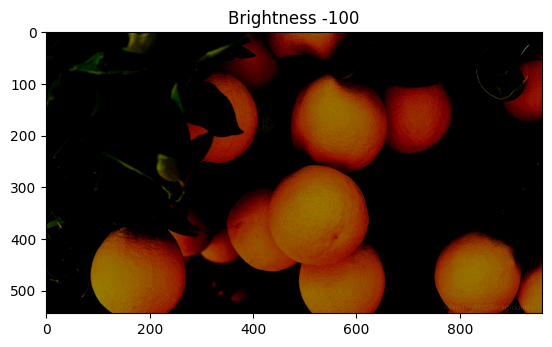

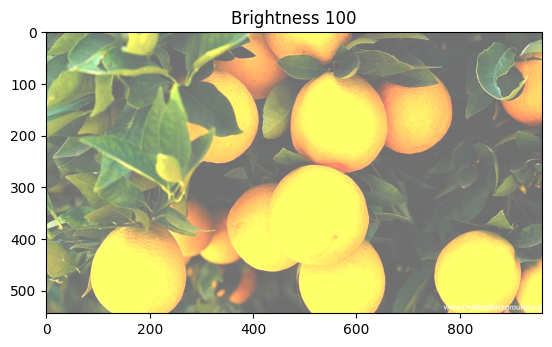

In [8]:
# Menerapkan fungsi rgbbrighter dengan nilai -100
rgbbrighter(-100)
# Menampilkan gambar hasil perubahan kecerahan
plt.imshow(img_rgbbrightness)
plt.title("Brightness -100")
plt.show()

# Menerapkan fungsi rgbbrighter dengan nilai 100
rgbbrighter(100)
# Menampilkan gambar hasil perubahan kecerahan
plt.imshow(img_rgbbrightness)
plt.title("Brightness 100")
plt.show()

In [9]:
# Membuat array kosong dengan tipe data uint8
img_contrass = np.zeros(img.shape, dtype=np.uint8)

In [10]:
# Fungsi untuk meningkatkan kontras gambar dengan nilai tertentu
def contrass(nilai):
    # Melakukan perulangan untuk setiap piksel dalam gambar
    for y in range(0, img_height):
        for x in range(0, img_width):
            # Mengambil nilai merah, hijau, dan biru dari piksel
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            # Menghitung nilai keabuan rata-rata piksel
            gray = (int(red) + int(green) + int(blue)) / 3
            # Mengalikan nilai keabuan dengan faktor kontras
            gray *= nilai
            if gray > 255:
                gray = 255
            # Menyimpan nilai piksel yang telah ditingkatkan kontrasnya ke dalam array img_contrass
            img_contrass[y][x] = (gray, gray, gray)

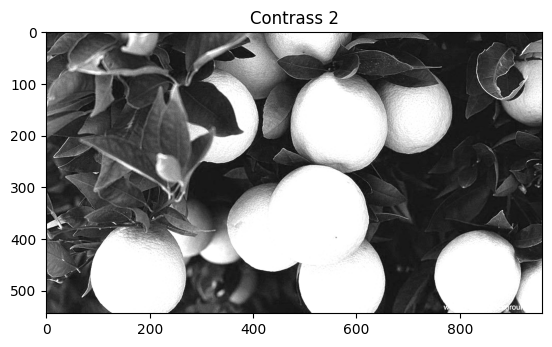

Text(0.5, 1.0, 'Contrass 3')

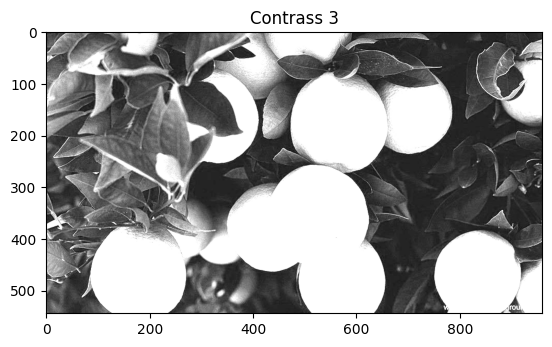

In [11]:
# Menerapkan fungsi contrass dengan nilai 2
contrass(2)
# Menampilkan gambar hasil perubahan kontras
plt.imshow(img_contrass)
plt.title("Contrass 2")
plt.show()

# Menerapkan fungsi contrass dengan nilai 3
contrass(3)
# Menampilkan gambar hasil perubahan kontras
plt.imshow(img_contrass)
plt.title("Contrass 3")

In [12]:
# Membuat array kosong dengan tipe data uint8
img_autocontrass = np.zeros(img.shape, dtype=np.uint8)

In [13]:
def autocontrass():
    xmax = 300  # Nilai maksimum awal untuk penghitungan tingkat kontras
    xmin = 0  # Nilai minimum awal untuk penghitungan tingkat kontras
    d = 0  # Nilai perbedaan (d) yang akan digunakan untuk menghitung tingkat kontras

    # Mendapatkan nilai d, dimana nilai d ini akan berpengaruh pada hitungan
    # untuk mendapatkan tingkat kontras
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3
            if gray < xmax:
                xmax = gray
            if gray > xmin:
                xmin = gray
    
    d = xmin - xmax  # Menghitung nilai perbedaan (d)
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3
            gray = int(float(255/d) * (gray-xmax))
            img_autocontrass[y][x] = (gray, gray, gray)

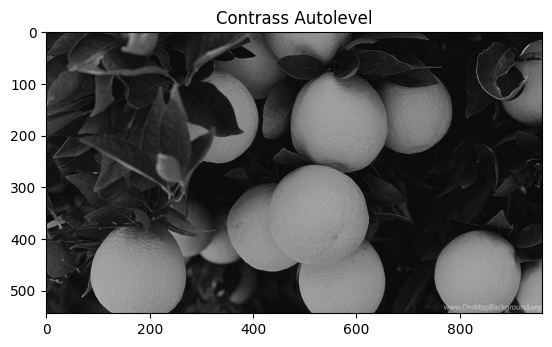

In [14]:
autocontrass()
plt.imshow(img_autocontrass)
plt.title("Contrass Autolevel")
plt.show()